In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dirdatain = '../data/'

species = {} # dictionary with the IDs of the species (as they change across networks)

mydf = pd.read_csv(dirdatain+'bsm_raw_pollen.csv')
mydf = mydf.fillna(0)
mydf['age'] = -mydf['age']
mydf = mydf.sort_values(by=['age'])

# rename the columns: remove the spaces and replace them with underscores

mydf.columns = [col.replace(' ', '_') for col in mydf.columns]

all_my_species = list(mydf.columns)[1:]


(array([38, 33, 13,  8, 15, 10, 23]), array([-9798.        , -8390.16142857, -6982.32285714, -5574.48428571,
       -4166.64571429, -2758.80714286, -1350.96857143,    56.87      ])) 
 (array([71, 46, 21, 23, 25, 33]), array([-8390.16142857, -6982.32285714, -5574.48428571, -4166.64571429,
       -2758.80714286, -1350.96857143]))


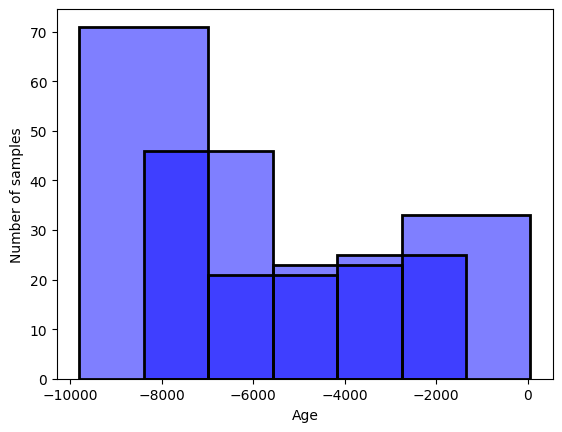

In [54]:
fig, ax = plt.subplots()

# Divide the data into 7 groups
histogram = np.histogram(mydf['age'].to_numpy(), bins=7)

# add each column of the histogram to the next one

histogram2 = (histogram[0][:-1] + histogram[0][1:], histogram[1][1:-1])

print(histogram, "\n", histogram2)

# plot the histogram, with the bars centered at the middle of the bin and twice as wide as the bin
ax.bar(histogram2[1], histogram2[0], width=(histogram2[1][1] - histogram2[1][0])*2, align='center', color='blue',
    alpha=0.5)
ax.bar(histogram2[1], histogram2[0], width=(histogram2[1][1] - histogram2[1][0])*2, align='center',
    alpha=1, edgecolor='black', lw=2, color = 'none')

ax.set_xlabel('Age')
ax.set_ylabel('Number of samples')
fig.show()

fig.savefig('../code/plots_notes/age_histogram.png')